In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
from pathlib import Path

from tqdm import tqdm
from pandas_summary import DataFrameSummary
import matplotlib.pyplot as plt
%matplotlib inline
# function import
from fastai.utils.mem import *

# other function teset
gpu_mem_get_all()

[GPUMemory(total=12207, free=11854, used=353),
 GPUMemory(total=12212, free=12200, used=12)]

In [2]:
path = Path("/home/visionosl/Downloads/Earthquake")

In [3]:
data_x = pd.read_csv(path/'train_values.csv')
data_x.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [5]:
data_x.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [6]:
data_y = pd.read_csv(path/'train_labels.csv')
data_y.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
building_id     260601 non-null int64
damage_grade    260601 non-null int64
dtypes: int64(2)
memory usage: 4.0 MB


In [8]:
data_y.isnull().sum()

building_id     0
damage_grade    0
dtype: int64

In [9]:
data_y['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [10]:
df = pd.merge(data_x, data_y, on='building_id')
df.columns, len(df.columns)

(Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
        'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
        'land_surface_condition', 'foundation_type', 'roof_type',
        'ground_floor_type', 'other_floor_type', 'position',
        'plan_configuration', 'has_superstructure_adobe_mud',
        'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
        'has_superstructure_cement_mortar_stone',
        'has_superstructure_mud_mortar_brick',
        'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
        'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
        'has_superstructure_rc_engineered', 'has_superstructure_other',
        'legal_ownership_status', 'count_families', 'has_secondary_use',
        'has_secondary_use_agriculture', 'has_secondary_use_hotel',
        'has_secondary_use_rental', 'has_secondary_use_institution',
        'has_secondary_use_school', 'has_

In [11]:
ds = DataFrameSummary(df)

In [12]:
ds.columns_types

bool           22
numeric        10
categorical     8
Name: types, dtype: int64

In [13]:
ds.columns_stats

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
counts,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601,260601
uniques,260601,31,1414,11595,9,42,84,27,3,5,3,5,4,4,10,2,2,2,2,2,2,2,2,2,2,2,4,10,2,2,2,2,2,2,2,2,2,2,2,3
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,categorical,categorical,categorical,categorical,categorical,categorical,categorical,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,categorical,numeric,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,numeric


In [14]:
reduce_mem_usage(df)

Memory usage of dataframe is 81.52 MB
Memory usage after optimization is: 13.42 MB
Decreased by 83.5%


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [15]:
cat_names = []
cont_names = []
dep_var = 'damage_grade'
for c in data_x.columns:
    if ds.columns_stats[c].types == 'categorical':
        cat_names.append(c)
    elif ds.columns_stats[c].types == 'numeric' and c!='damage_grade':
        cont_names.append(c)

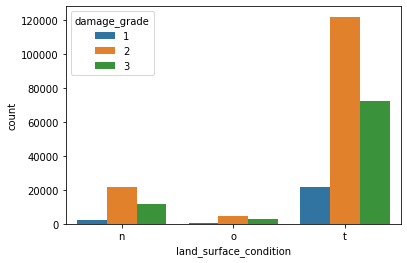

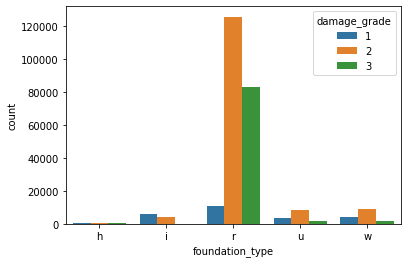

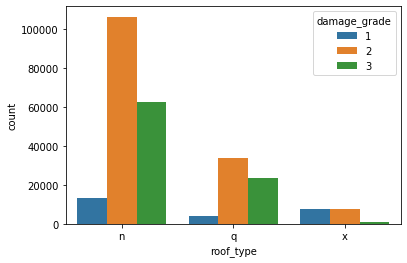

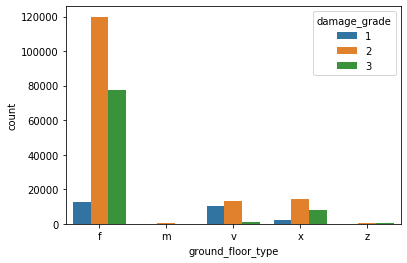

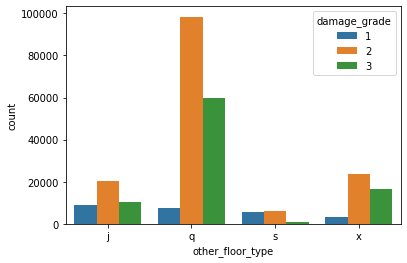

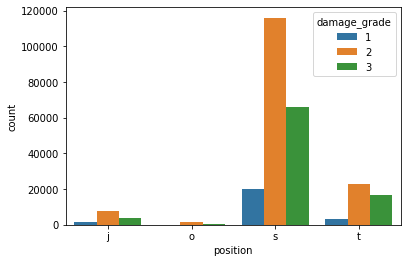

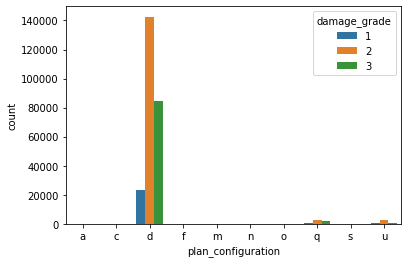

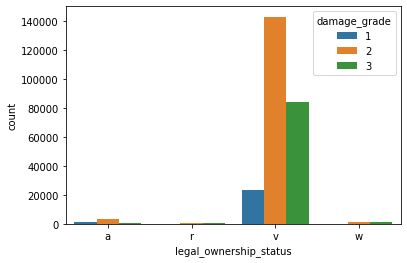

In [16]:
for i in range(8):
    sns.countplot(x=cat_names[i], hue="damage_grade", data=df)
    plt.show()

In [ ]:
sns.pairplot(df, hue="damage_grade")

### Fastai

In [132]:
from fastai.tabular import *
from fastai.callbacks import *
from fastai.metrics import *

In [140]:
procs = [FillMissing, Categorify, Normalize]
valid_idx = range(len(df)-2000, len(df))
bs = 512

In [141]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, bs=bs)
print(data.train_ds.cont_names, len(data.train_ds.cont_names)) 

['count_floors_pre_eq', 'height_percentage', 'has_secondary_use_other', 'plan_configuration_u', 'has_superstructure_timber', 'has_secondary_use_health_post', 'plan_configuration_m', 'has_superstructure_other', 'legal_ownership_status_w', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_secondary_use_rental', 'plan_configuration_d', 'legal_ownership_status_a', 'has_secondary_use_industry', 'plan_configuration_f', 'other_floor_type_x', 'ground_floor_type_x', 'has_secondary_use_agriculture', 'has_secondary_use_use_police', 'other_floor_type_j', 'foundation_type_w', 'geo_level_1_id', 'geo_level_3_id', 'land_surface_condition_t', 'geo_level_2_id', 'position_s', 'age', 'has_secondary_use_institution', 'area_percentage', 'other_floor_type_q', 'foundation_type_h', 'has_superstructure_mud_mortar_stone', 'has_superstructure_rc_engineered', 'count_families', 'has_secondary_use_school', 'land_surface_condition_o', 'legal_ownership_status_r', 'has_superstructure

In [142]:
data.classes

[1, 2, 3]

In [143]:
data.show_batch(rows=5)

count_floors_pre_eq,height_percentage,has_secondary_use_other,plan_configuration_u,has_superstructure_timber,has_secondary_use_health_post,plan_configuration_m,has_superstructure_other,legal_ownership_status_w,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_secondary_use_rental,plan_configuration_d,legal_ownership_status_a,has_secondary_use_industry,plan_configuration_f,other_floor_type_x,ground_floor_type_x,has_secondary_use_agriculture,has_secondary_use_use_police,other_floor_type_j,foundation_type_w,geo_level_1_id,geo_level_3_id,land_surface_condition_t,geo_level_2_id,position_s,age,has_secondary_use_institution,area_percentage,other_floor_type_q,foundation_type_h,has_superstructure_mud_mortar_stone,has_superstructure_rc_engineered,count_families,has_secondary_use_school,land_surface_condition_o,legal_ownership_status_r,has_superstructure_stone_flag,ground_floor_type_f,position_o,has_superstructure_adobe_mud,roof_type_n,plan_configuration_o,has_secondary_use_gov_office,plan_configuration_c,other_floor_type_s,roof_type_q,has_superstructure_bamboo,foundation_type_u,has_superstructure_rc_non_engineered,has_superstructure_cement_mortar_brick,plan_configuration_n,roof_type_x,legal_ownership_status_v,building_id,plan_configuration_a,ground_floor_type_m,ground_floor_type_z,foundation_type_i,ground_floor_type_v,position_t,foundation_type_r,plan_configuration_q,has_secondary_use,land_surface_condition_n,plan_configuration_s,has_secondary_use_hotel,position_j,target
1.1961,0.2951,-0.0719,-0.1192,-0.5850,-0.0138,-0.0133,-0.1232,-0.1017,-0.1363,-0.2704,-0.0903,0.2052,-0.1470,-0.0328,-0.0092,-0.4479,-0.3248,-0.2624,-0.0094,-0.4248,-0.2485,-0.4857,0.6356,0.4494,0.7409,0.5375,0.3199,-0.0307,-0.6873,0.7601,-0.0747,0.5589,-0.1268,0.0383,-0.0191,-0.1817,-0.0753,-0.1884,0.4926,-0.0950,-0.3119,0.6516,-0.0247,-0.0121,-0.0354,-0.2200,-0.5565,-0.3049,-0.2407,-0.2108,-0.2853,-0.0121,-0.2571,0.1961,1.0551,-0.0310,-0.0443,-0.0622,-0.2055,-0.3225,-0.4436,0.4345,-0.1493,-0.3549,-0.3968,-0.0365,-0.1864,-0.2315,3
-0.1782,-0.7479,-0.0719,-0.1192,1.7093,-0.0138,-0.0133,-0.1232,-0.1017,-0.1363,-0.2704,-0.0903,0.2052,-0.1470,-0.0328,-0.0092,2.2381,-0.3248,-0.2624,-0.0094,-0.4248,-0.2485,0.7589,-0.4444,-2.2210,-1.3693,0.5375,-0.1569,-0.0307,0.2238,-1.3180,-0.0747,-1.7892,-0.1268,0.0383,-0.0191,-0.1817,-0.0753,-0.1884,0.4926,-0.0950,-0.3119,-1.5321,-0.0247,-0.0121,-0.0354,-0.2200,1.7980,-0.3049,-0.2407,-0.2108,-0.2853,-0.0121,-0.2571,0.1961,0.4541,-0.0310,-0.0443,-0.0622,-0.2055,-0.3225,-0.4436,0.4345,-0.1493,-0.3549,2.5125,-0.0365,-0.1864,-0.2315,1
1.1961,1.3381,-0.0719,-0.1192,-0.5850,-0.0138,-0.0133,-0.1232,-0.1017,-0.1363,-0.2704,-0.0903,0.2052,-0.1470,-0.0328,-0.0092,-0.4479,-0.3248,-0.2624,-0.0094,-0.4248,-0.2485,1.6301,-1.1840,0.4494,1.0995,0.5375,0.1837,-0.0307,4.3235,-1.3180,-0.0747,-1.7892,-0.1268,0.0383,-0.0191,-0.1817,-0.0753,-0.1884,-2.0253,-0.0950,-0.3119,-1.5321,-0.0247,-0.0121,-0.0354,4.5538,-0.5565,-0.3049,4.1585,-0.2108,3.5046,-0.0121,3.8865,0.1961,-1.7099,-0.0310,-0.0443,-0.0622,-0.2055,3.0959,-0.4436,-2.3015,-0.1493,-0.3549,-0.3968,-0.0365,-0.1864,-0.2315,3
-0.1782,1.3381,-0.0719,-0.1192,-0.5850,-0.0138,-0.0133,-0.1232,-0.1017,-0.1363,-0.2704,-0.0903,0.2052,-0.1470,-0.0328,-0.0092,2.2381,3.0761,-0.2624,-0.0094,-0.4248,-0.2485,-0.9835,-1.4832,-2.2210,-0.1192,0.5375,-0.2931,-0.0307,0.6793,-1.3180,-0.0747,0.5589,-0.1268,0.0383,-0.0191,5.5102,-0.0753,-0.1884,-2.0253,-0.0950,-0.3119,0.6516,-0.0247,-0.0121,-0.0354,-0.2200,-0.5565,-0.3049,-0.2407,-0.2108,-0.2853,-0.0121,-0.2571,0.1961,0.0576,-0.0310,-0.0443,-0.0622,-0.2055,-0.3225,-0.4436,0.4345,-0.1493,-0.3549,-0.3968,-0.0365,-0.1864,-0.2315,2
-1.5525,-1.2694,-0.0719,-0.1192,-0.5850,-0.0138,-0.0133,-0.1232,-0.1017,-0.1363,-0.2704,-0.0903,0.2052,-0.1470,-0.0328,-0.0092,-0.4479,3.0761,-0.2624,-0.0094,2.3537,-0.2485,-0.4857,-1.5425,0.4494,-0.6885,0.5375,0.5924,-0.0307,-0.6873,-1.3180,-0.0747,0.5589,-0.1268,0.0383,-0.0191,-0.1817,-0.0753,-0.1884,-2.0253,-0.0950,-0.3119

In [144]:
callback_fns=[partial(EarlyStoppingCallback, monitor='f_beta', min_delta=0.001, patience=7)]
fbeta = FBeta(beta=1, average="micro")

In [145]:
learn = tabular_learner(data, layers=[50, 1000, 30], metrics=[accuracy, fbeta], emb_drop=0.04, callback_fns=callback_fns)
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(69, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=69, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=50, out_features=1000, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=1000, out_features=30, bias=True)
    (7): ReLU(inplace=True)
    (8): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=30, out_features=3, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


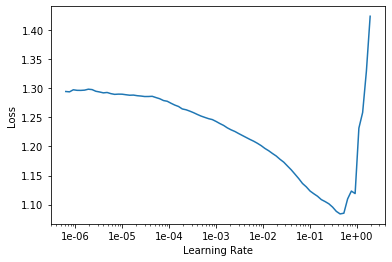

In [146]:
learn.lr_find()
learn.recorder.plot()

In [147]:
lr = 1e-2
learn.fit_one_cycle(50, lr, callbacks=[SaveModelCallback(learn, every='improvement', monitor='f_beta', name='best')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.788410,0.768718,0.626500,0.626500,00:07
1,0.747554,0.744859,0.637500,0.637500,00:07
2,0.721938,0.715732,0.657000,0.657000,00:07
3,0.714961,0.703006,0.659000,0.659000,00:07
4,0.705178,0.688642,0.671000,0.671000,00:07
5,0.704870,0.691660,0.663500,0.663500,00:07
6,0.699540,0.688489,0.670500,0.670500,00:07
7,0.697833,0.680843,0.672000,0.672000,00:07
8,0.684004,0.680421,0.675000,0.675000,00:07
9,0.689456,0.676601,0.680000,0.680000,00:07


Better model found at epoch 0 with f_beta value: 0.6264998912811279.
Better model found at epoch 1 with f_beta value: 0.637499988079071.
Better model found at epoch 2 with f_beta value: 0.6570000052452087.
Better model found at epoch 3 with f_beta value: 0.6589999198913574.
Better model found at epoch 4 with f_beta value: 0.6710000038146973.
Better model found at epoch 7 with f_beta value: 0.671999990940094.
Better model found at epoch 8 with f_beta value: 0.675000011920929.
Better model found at epoch 9 with f_beta value: 0.6800000667572021.
Better model found at epoch 11 with f_beta value: 0.6840000152587891.
Better model found at epoch 13 with f_beta value: 0.6859999299049377.
Better model found at epoch 16 with f_beta value: 0.6940000653266907.
Better model found at epoch 18 with f_beta value: 0.7035000324249268.
Epoch 26: early stopping


In [148]:
interp = ClassificationInterpretation.from_learner(learn)

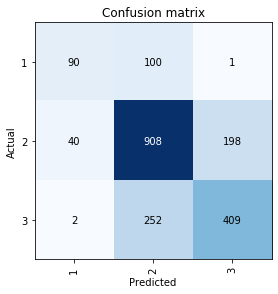

In [149]:
interp.plot_confusion_matrix()

#### Test

In [17]:
df_test = pd.read_csv(path/'test_values.csv')
df_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
building_id                               86868 non-null int64
geo_level_1_id                            86868 non-null int64
geo_level_2_id                            86868 non-null int64
geo_level_3_id                            86868 non-null int64
count_floors_pre_eq                       86868 non-null int64
age                                       86868 non-null int64
area_percentage                           86868 non-null int64
height_percentage                         86868 non-null int64
land_surface_condition                    86868 non-null object
foundation_type                           86868 non-null object
roof_type                                 86868 non-null object
ground_floor_type                         86868 non-null object
other_floor_type                          86868 non-null object
position                                  86868 non-null object
pla

In [ ]:
dts = DataFrameSummary(df_test)

In [ ]:
dts.columns_types

In [ ]:
dts.columns_stats

In [ ]:
%time
prediction = []
for i in tqdm(range(len(df_test))):
    prediction.append(learn.predict(df_test.loc[i])[0].data)

In [ ]:
prediction[:5]

In [ ]:
subs = pd.read_csv('submission_format.csv')
subs['damage_grade'] = test_preds
subs.to_csv('results_fastai.csv', index=False)

### xgboost, catboost, lightgbm and sklearn

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, fbeta_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
import lightgbm as lgb
import catboost as cb
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import plot_importance
import scikitplot as skplt

In [20]:
## categorical encoding

# le_dict = {col: LabelEncoder() for col in cat_names}
# for col in cat_names:
#     df[col] = le_dict[col].fit_transform(df[col])
#     df_test[col] = le_dict[col].transform(df_test[col])

In [21]:
## categorical encoding
df = pd.get_dummies(df, columns=cat_names, prefix=cat_names)
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [22]:
df_test = pd.get_dummies(df_test, columns=cat_names, prefix=cat_names)
df_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,300051,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,99355,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,890251,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,745817,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,421793,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [23]:
sc = StandardScaler()
df[cont_names] = sc.fit_transform(df[cont_names])
df_test[cont_names] = sc.transform(df_test[cont_names])

In [24]:
cols = list(df.columns)
del cols[-1]

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(df.drop(['damage_grade'], axis=1), df['damage_grade'], test_size=0.01, random_state=42)
print ('Training shape:', X_train.shape, y_train.shape)
print ('Valid shape:', X_valid.shape, y_valid.shape)

Training shape: (257994, 69) (257994,)
Valid shape: (2607, 69) (2607,)


In [26]:
names = ['foundation_type_r',
  'geo_level_1_id',
  'ground_floor_type_v',
  'has_superstructure_mud_mortar_stone',
  'roof_type_x',
  'foundation_type_i',
  'geo_level_2_id',
  'has_superstructure_cement_mortar_brick',
  'foundation_type_w',
  'has_superstructure_stone_flag',
  'foundation_type_h',
  'has_superstructure_adobe_mud',
  'has_superstructure_mud_mortar_brick',
  'other_floor_type_q',
  'has_secondary_use_other',
  'geo_level_3_id',
  'has_superstructure_timber',
  'has_superstructure_rc_engineered',
  'has_secondary_use_agriculture',
  'has_superstructure_other',
  'plan_configuration_a',
  'other_floor_type_s',
  'has_superstructure_cement_mortar_stone',
  'age',
  'has_superstructure_bamboo',
  'count_floors_pre_eq',
  'legal_ownership_status_w',
  'ground_floor_type_x',
  'ground_floor_type_f',
  'roof_type_q',
  'plan_configuration_u']

In [27]:
#c_names = [n for n in names if n in cat_names]
X_train1 = X_train[names]
X_valid1 = X_valid[names]
df_test1 = df_test[names]

In [28]:
len(names), X_train1.shape

(31, (257994, 31))

###  sklearn classifiers

In [29]:
classifiers = [
    RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced", max_depth=25),
#     LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=500),
#     LinearDiscriminantAnalysis(),
#     GaussianNB(),
#     BernoulliNB(),
#     DecisionTreeClassifier(),
    BaggingClassifier(n_estimators=500, random_state=42, max_features=27)
]

results = pd.DataFrame(columns=["Classifier", "Accuracy", "FBeta"])

RandomForestClassifier 0.6808592251630227 0.6808592251630227


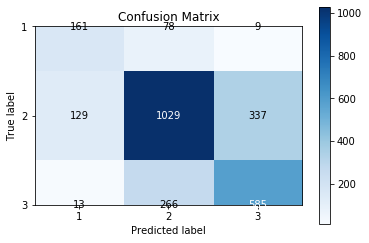

BaggingClassifier 0.7242040659762179 0.724204065976218


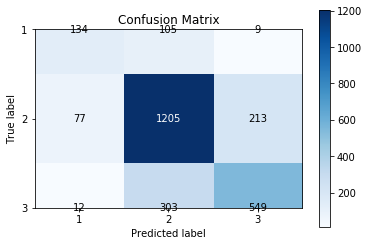

In [30]:
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train1, y_train)
    acc = accuracy_score(y_valid, clf.predict(X_valid1))
    fbeta = fbeta_score(y_valid, clf.predict(X_valid1), beta=1, average="micro")
    print (name, acc, fbeta)
    skplt.metrics.plot_confusion_matrix(y_valid, clf.predict(X_valid1))
    plt.show()
    log_entry = pd.DataFrame([[name, acc*100, fbeta]], columns=["Classifier", "Accuracy", "FBeta"])
    results = results.append(log_entry)

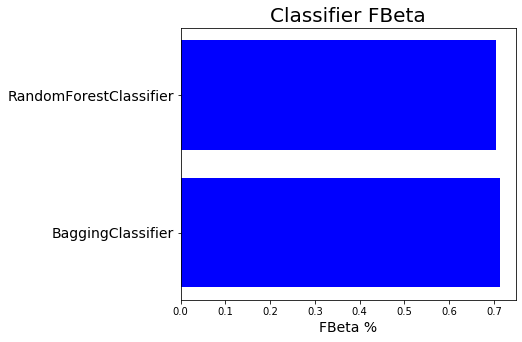

In [212]:
#results = results.append(pd.DataFrame([['fast.ai', 68.2, 0.68]], columns=["Classifier", "Accuracy", "FBeta"]))
results = results.sort_values('FBeta', ascending=False)

fig, ax = plt.subplots(1,1, figsize=(6,5))

ax.barh(results['Classifier'], results['FBeta'], color="b")
ax.tick_params(axis="y", labelsize=14)
ax.set_xlabel('FBeta %', fontsize=14)
ax.set_title('Classifier FBeta', fontsize=20);

In [ ]:
print (results)

### xgboost

In [197]:
# clf =  XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
#                      nrounds = 'min.error.idx', num_class = 3, class_weight="balanced", 
#                      maximize = False, eval_metric = 'logloss', eta = .1, max_depth = 14,
#                      colsample_bytree = .5, n_jobs=-1, random_state=42, 
#                      tree_method='gpu_hist', gpu_id=1)

# param_dist = {"max_depth": [15, 20],
#               "colsample_bytree": [0.5, 0.8]
#              }

# grid_search = GridSearchCV(clf, n_jobs=-1, param_grid=param_dist, cv=3, scoring="f1_micro", verbose=5)
# grid_search.fit(X_train, y_train)
# print (grid_search.best_estimator_)

In [31]:
clf =  XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                     nrounds = 'min.error.idx', num_class = 3, class_weight="balanced", 
                     maximize = False, eval_metric = 'logloss', eta = .1, max_depth = 14,
                     colsample_bytree = .5, n_jobs=-1, random_state=42,
                     tree_method='gpu_hist', gpu_id=1)

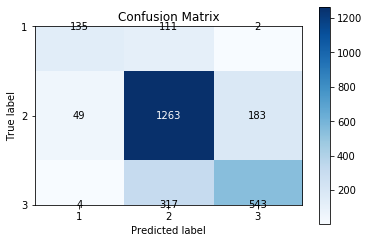

0.7445339470655926 0.7445339470655926


In [32]:
clf.fit(X_train1, y_train)
# num_round = clf.get_num_boosting_rounds()
# for booster=dart in predict , ntree_limit=num_round
acc = accuracy_score(y_valid, clf.predict(X_valid1))
fbeta = fbeta_score(y_valid, clf.predict(X_valid1), beta=1, average="micro")
skplt.metrics.plot_confusion_matrix(y_valid, clf.predict(X_valid1))
plt.show()
test_preds = clf.predict(df_test1)
print (acc, fbeta)

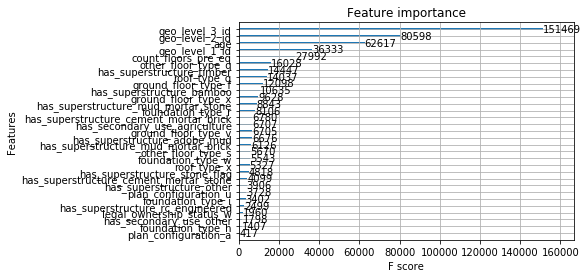

In [33]:
# feature importance
plot_importance(clf)
plt.show()

In [34]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train1.columns[i] for i in indices]

In [35]:
names, np.sort(importances)[::-1]

(['foundation_type_r',
  'geo_level_1_id',
  'ground_floor_type_v',
  'has_superstructure_mud_mortar_stone',
  'foundation_type_i',
  'has_superstructure_cement_mortar_brick',
  'geo_level_2_id',
  'roof_type_x',
  'has_superstructure_stone_flag',
  'has_superstructure_adobe_mud',
  'foundation_type_w',
  'foundation_type_h',
  'geo_level_3_id',
  'other_floor_type_q',
  'has_superstructure_mud_mortar_brick',
  'has_superstructure_timber',
  'has_superstructure_cement_mortar_stone',
  'legal_ownership_status_w',
  'has_secondary_use_agriculture',
  'count_floors_pre_eq',
  'ground_floor_type_f',
  'has_superstructure_other',
  'has_secondary_use_other',
  'roof_type_q',
  'has_superstructure_rc_engineered',
  'age',
  'has_superstructure_bamboo',
  'ground_floor_type_x',
  'plan_configuration_a',
  'plan_configuration_u',
  'other_floor_type_s'],
 array([0.179744, 0.124664, 0.08479 , 0.064065, 0.045758, 0.041583, 0.03717 , 0.029513, 0.027298, 0.025928, 0.023559,
        0.020341, 0.019

In [36]:
# Fit model using each importance as a threshold
thresholds = np.sort(clf.feature_importances_)[:10]
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train1)
    select_X_valid = selection.transform(X_valid1)
    selection_model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                     nrounds = 'min.error.idx', num_class = 3, class_weight="balanced", 
                     maximize = False, eval_metric = 'logloss', eta = .1, max_depth = 14,
                     colsample_bytree = .5, n_jobs=-1, random_state=42, 
                     tree_method='gpu_hist', gpu_id=1)
    selection_model.fit(select_X_train, y_train)
    acc = accuracy_score(y_valid, selection_model.predict(select_X_valid))
    fbeta = fbeta_score(y_valid, selection_model.predict(select_X_valid), beta=1, average="micro")
    print (thresh, select_X_train.shape[1], acc, fbeta)

0.012082626 31 0.7445339470655926 0.7445339470655926
0.012562693 30 0.7357115458381281 0.7357115458381283
0.012840733 29 0.7391637897967012 0.7391637897967012
0.013619033 28 0.7406981204449559 0.7406981204449559
0.013869605 27 0.7376294591484465 0.7376294591484465
0.014964304 26 0.7410817031070196 0.7410817031070196
0.015060155 25 0.7368622938243191 0.7368622938243191
0.015154514 24 0.7383966244725738 0.7383966244725737
0.015592914 23 0.7349443805140008 0.7349443805140008
0.015627708 22 0.7345607978519371 0.7345607978519372


In [ ]:
# # select features using threshold
# thresh = 0.016073223
# selection = SelectFromModel(clf, threshold=thresh, prefit=True)
# select_X_train = selection.transform(X_train)
# select_X_valid = selection.transform(X_valid)
# select_X_test = selection.transform(df_test)

# clf =  XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
#                      nrounds = 'min.error.idx', num_class = 3, class_weight="balanced", 
#                      maximize = False, eval_metric = 'logloss', eta = .1, max_depth = 14,
#                      colsample_bytree = .5, n_jobs=-1, random_state=42, 
#                      tree_method='gpu_hist', gpu_id=1)

# clf.fit(select_X_train, y_train)
# acc = accuracy_score(y_valid, clf.predict(select_X_valid))
# fbeta = fbeta_score(y_valid, clf.predict(select_X_valid), beta=1, average="micro")
# test_preds = clf.predict(select_X_test)
# print (acc, fbeta)

In [37]:
subs = pd.read_csv('submission_format.csv')
subs['damage_grade'] = test_preds
subs.to_csv('results_xgboost_1.csv', index=False)

### lightgbm

In [ ]:
# #parameter tuning

# param_dist = {"max_depth": [10, 50, 75],
#               "learning_rate" : [0.2, 0.5],
#               "num_leaves": [300, 900],
#               "n_estimators": [200, 500]
#              }

# grid_search = GridSearchCV(model, n_jobs=-1, param_grid=param_dist, cv=3, scoring="f1_micro", verbose=5)
# grid_search.fit(X_train, y_train)
# print (grid_search.best_estimator_)

In [38]:
model = lgb.LGBMClassifier(n_estimators=500, boosting_type='dart', class_weight='balanced',
                           silent=False, max_depth=14, num_leaves=2000, 
                           objective="multiclass", random_state=42)

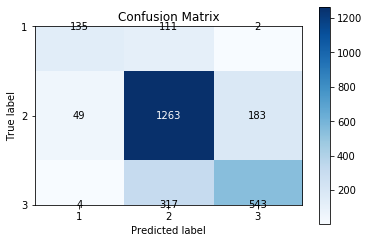

0.6954353663214423 0.6954353663214423


In [39]:
#Without Catgeorical Features
model.fit(X_train1, y_train)
acc = accuracy_score(y_valid, model.predict(X_valid1))
fbeta = fbeta_score(y_valid, model.predict(X_valid1), beta=1, average="micro")
skplt.metrics.plot_confusion_matrix(y_valid, clf.predict(X_valid1))
plt.show()
test_preds = model.predict(df_test1)
print (acc, fbeta)

In [109]:
subs = pd.read_csv('submission_format.csv')
subs['damage_grade'] = test_preds
subs.to_csv('results_lightgbm.csv', index=False)

### catboost

In [110]:
# grid = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}
# cb = cb.CatBoostClassifier()
# # grid_search = GridSearchCV(model, n_jobs=-1, param_grid=param_dist, cv=3, scoring="f1_micro", verbose=5)
# # grid_search.fit(X_train, y_train)

In [40]:
#Without Categorical features
clf = cb.CatBoostClassifier(loss_function="MultiClass", custom_metric="F1", eval_metric="Accuracy", random_seed=42,
                            depth=13, iterations=1000, l2_leaf_reg= 12, learning_rate= 0.4, task_type="GPU")
clf.fit(X_train1, y_train)

0:	learn: 0.6594688	total: 184ms	remaining: 3m 4s
1:	learn: 0.6688876	total: 351ms	remaining: 2m 55s
2:	learn: 0.6706668	total: 511ms	remaining: 2m 49s
3:	learn: 0.6765080	total: 676ms	remaining: 2m 48s
4:	learn: 0.6793685	total: 838ms	remaining: 2m 46s
5:	learn: 0.6829539	total: 1s	remaining: 2m 46s
6:	learn: 0.6857136	total: 1.17s	remaining: 2m 45s
7:	learn: 0.6882331	total: 1.33s	remaining: 2m 44s
8:	learn: 0.6902990	total: 1.51s	remaining: 2m 46s
9:	learn: 0.6914734	total: 1.67s	remaining: 2m 45s
10:	learn: 0.6926285	total: 1.82s	remaining: 2m 44s
11:	learn: 0.6936944	total: 1.98s	remaining: 2m 43s
12:	learn: 0.6950162	total: 2.16s	remaining: 2m 44s
13:	learn: 0.6962449	total: 2.33s	remaining: 2m 44s
14:	learn: 0.6973961	total: 2.49s	remaining: 2m 43s
15:	learn: 0.6994194	total: 2.65s	remaining: 2m 43s
16:	learn: 0.7009155	total: 2.83s	remaining: 2m 43s
17:	learn: 0.7025977	total: 3s	remaining: 2m 43s
18:	learn: 0.7057567	total: 3.15s	remaining: 2m 42s
19:	learn: 0.7064971	total: 3

159:	learn: 0.7694404	total: 27.3s	remaining: 2m 23s
160:	learn: 0.7701691	total: 27.4s	remaining: 2m 23s
161:	learn: 0.7700993	total: 27.6s	remaining: 2m 22s
162:	learn: 0.7704792	total: 27.8s	remaining: 2m 22s
163:	learn: 0.7708047	total: 28s	remaining: 2m 22s
164:	learn: 0.7709288	total: 28.1s	remaining: 2m 22s
165:	learn: 0.7711110	total: 28.3s	remaining: 2m 22s
166:	learn: 0.7712582	total: 28.5s	remaining: 2m 22s
167:	learn: 0.7714792	total: 28.7s	remaining: 2m 22s
168:	learn: 0.7716769	total: 28.9s	remaining: 2m 21s
169:	learn: 0.7718707	total: 29s	remaining: 2m 21s
170:	learn: 0.7721769	total: 29.2s	remaining: 2m 21s
171:	learn: 0.7724327	total: 29.4s	remaining: 2m 21s
172:	learn: 0.7725800	total: 29.5s	remaining: 2m 21s
173:	learn: 0.7727428	total: 29.7s	remaining: 2m 21s
174:	learn: 0.7728823	total: 29.9s	remaining: 2m 20s
175:	learn: 0.7733126	total: 30.1s	remaining: 2m 20s
176:	learn: 0.7735412	total: 30.3s	remaining: 2m 20s
177:	learn: 0.7738242	total: 30.4s	remaining: 2m 2

317:	learn: 0.7984914	total: 55s	remaining: 1m 57s
318:	learn: 0.7987434	total: 55.2s	remaining: 1m 57s
319:	learn: 0.7989217	total: 55.3s	remaining: 1m 57s
320:	learn: 0.7989953	total: 55.5s	remaining: 1m 57s
321:	learn: 0.7991426	total: 55.7s	remaining: 1m 57s
322:	learn: 0.7992085	total: 55.8s	remaining: 1m 57s
323:	learn: 0.7992860	total: 56s	remaining: 1m 56s
324:	learn: 0.7993015	total: 56.2s	remaining: 1m 56s
325:	learn: 0.7996000	total: 56.4s	remaining: 1m 56s
326:	learn: 0.7998171	total: 56.5s	remaining: 1m 56s
327:	learn: 0.7998636	total: 56.7s	remaining: 1m 56s
328:	learn: 0.7999760	total: 56.9s	remaining: 1m 56s
329:	learn: 0.8001194	total: 57.1s	remaining: 1m 55s
330:	learn: 0.8003093	total: 57.2s	remaining: 1m 55s
331:	learn: 0.8003713	total: 57.4s	remaining: 1m 55s
332:	learn: 0.8005225	total: 57.6s	remaining: 1m 55s
333:	learn: 0.8005225	total: 57.8s	remaining: 1m 55s
334:	learn: 0.8008403	total: 57.9s	remaining: 1m 54s
335:	learn: 0.8008830	total: 58.1s	remaining: 1m 5

471:	learn: 0.8164880	total: 1m 22s	remaining: 1m 32s
472:	learn: 0.8164919	total: 1m 22s	remaining: 1m 31s
473:	learn: 0.8166585	total: 1m 22s	remaining: 1m 31s
474:	learn: 0.8167671	total: 1m 22s	remaining: 1m 31s
475:	learn: 0.8169686	total: 1m 23s	remaining: 1m 31s
476:	learn: 0.8170268	total: 1m 23s	remaining: 1m 31s
477:	learn: 0.8171585	total: 1m 23s	remaining: 1m 31s
478:	learn: 0.8174027	total: 1m 23s	remaining: 1m 30s
479:	learn: 0.8173950	total: 1m 23s	remaining: 1m 30s
480:	learn: 0.8175849	total: 1m 23s	remaining: 1m 30s
481:	learn: 0.8177283	total: 1m 24s	remaining: 1m 30s
482:	learn: 0.8178989	total: 1m 24s	remaining: 1m 30s
483:	learn: 0.8179803	total: 1m 24s	remaining: 1m 30s
484:	learn: 0.8180617	total: 1m 24s	remaining: 1m 29s
485:	learn: 0.8182051	total: 1m 24s	remaining: 1m 29s
486:	learn: 0.8184066	total: 1m 25s	remaining: 1m 29s
487:	learn: 0.8183485	total: 1m 25s	remaining: 1m 29s
488:	learn: 0.8184376	total: 1m 25s	remaining: 1m 29s
489:	learn: 0.8184531	total:

625:	learn: 0.8294612	total: 1m 50s	remaining: 1m 5s
626:	learn: 0.8296201	total: 1m 50s	remaining: 1m 5s
627:	learn: 0.8296046	total: 1m 50s	remaining: 1m 5s
628:	learn: 0.8296627	total: 1m 50s	remaining: 1m 5s
629:	learn: 0.8297906	total: 1m 50s	remaining: 1m 5s
630:	learn: 0.8299302	total: 1m 50s	remaining: 1m 4s
631:	learn: 0.8299185	total: 1m 51s	remaining: 1m 4s
632:	learn: 0.8300426	total: 1m 51s	remaining: 1m 4s
633:	learn: 0.8299922	total: 1m 51s	remaining: 1m 4s
634:	learn: 0.8300387	total: 1m 51s	remaining: 1m 4s
635:	learn: 0.8302170	total: 1m 51s	remaining: 1m 4s
636:	learn: 0.8302557	total: 1m 52s	remaining: 1m 3s
637:	learn: 0.8303371	total: 1m 52s	remaining: 1m 3s
638:	learn: 0.8304147	total: 1m 52s	remaining: 1m 3s
639:	learn: 0.8304806	total: 1m 52s	remaining: 1m 3s
640:	learn: 0.8304495	total: 1m 52s	remaining: 1m 3s
641:	learn: 0.8305852	total: 1m 52s	remaining: 1m 2s
642:	learn: 0.8305271	total: 1m 53s	remaining: 1m 2s
643:	learn: 0.8306782	total: 1m 53s	remaining:

782:	learn: 0.8395932	total: 2m 18s	remaining: 38.4s
783:	learn: 0.8396978	total: 2m 18s	remaining: 38.2s
784:	learn: 0.8397598	total: 2m 18s	remaining: 38s
785:	learn: 0.8397482	total: 2m 19s	remaining: 37.8s
786:	learn: 0.8399265	total: 2m 19s	remaining: 37.7s
787:	learn: 0.8399924	total: 2m 19s	remaining: 37.5s
788:	learn: 0.8400738	total: 2m 19s	remaining: 37.3s
789:	learn: 0.8401552	total: 2m 19s	remaining: 37.2s
790:	learn: 0.8401358	total: 2m 19s	remaining: 37s
791:	learn: 0.8402870	total: 2m 20s	remaining: 36.8s
792:	learn: 0.8403761	total: 2m 20s	remaining: 36.6s
793:	learn: 0.8404537	total: 2m 20s	remaining: 36.4s
794:	learn: 0.8405351	total: 2m 20s	remaining: 36.3s
795:	learn: 0.8405583	total: 2m 20s	remaining: 36.1s
796:	learn: 0.8406281	total: 2m 21s	remaining: 35.9s
797:	learn: 0.8406397	total: 2m 21s	remaining: 35.7s
798:	learn: 0.8406901	total: 2m 21s	remaining: 35.6s
799:	learn: 0.8407482	total: 2m 21s	remaining: 35.4s
800:	learn: 0.8407715	total: 2m 21s	remaining: 35.

939:	learn: 0.8470972	total: 2m 47s	remaining: 10.7s
940:	learn: 0.8471670	total: 2m 47s	remaining: 10.5s
941:	learn: 0.8472135	total: 2m 47s	remaining: 10.3s
942:	learn: 0.8471786	total: 2m 47s	remaining: 10.2s
943:	learn: 0.8471476	total: 2m 48s	remaining: 9.97s
944:	learn: 0.8473065	total: 2m 48s	remaining: 9.8s
945:	learn: 0.8473918	total: 2m 48s	remaining: 9.62s
946:	learn: 0.8474151	total: 2m 48s	remaining: 9.44s
947:	learn: 0.8474809	total: 2m 48s	remaining: 9.27s
948:	learn: 0.8474461	total: 2m 49s	remaining: 9.09s
949:	learn: 0.8474771	total: 2m 49s	remaining: 8.91s
950:	learn: 0.8474926	total: 2m 49s	remaining: 8.73s
951:	learn: 0.8476050	total: 2m 49s	remaining: 8.56s
952:	learn: 0.8475585	total: 2m 49s	remaining: 8.38s
953:	learn: 0.8476360	total: 2m 50s	remaining: 8.2s
954:	learn: 0.8477445	total: 2m 50s	remaining: 8.03s
955:	learn: 0.8477561	total: 2m 50s	remaining: 7.85s
956:	learn: 0.8478841	total: 2m 50s	remaining: 7.67s
957:	learn: 0.8478802	total: 2m 50s	remaining: 7

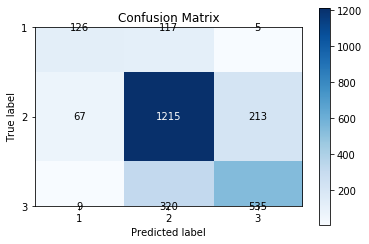

0.7196010740314538 0.7196010740314538


In [41]:
acc = accuracy_score(y_valid, clf.predict(X_valid1))
fbeta = fbeta_score(y_valid, clf.predict(X_valid1), beta=1, average="micro")
skplt.metrics.plot_confusion_matrix(y_valid, clf.predict(X_valid1))
plt.show()
test_preds = clf.predict(df_test1)
print (acc, fbeta)

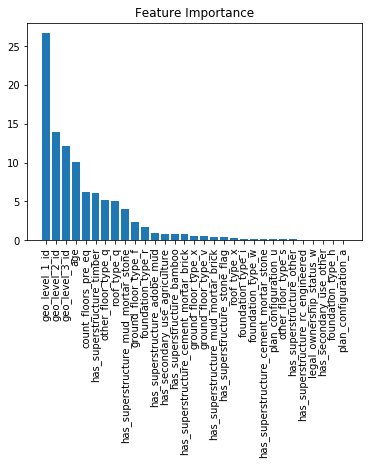

In [42]:
# Calculate feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train1.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train1.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train1.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [43]:
names, np.sort(importances)[::-1]

(['geo_level_1_id',
  'geo_level_2_id',
  'geo_level_3_id',
  'age',
  'count_floors_pre_eq',
  'has_superstructure_timber',
  'other_floor_type_q',
  'roof_type_q',
  'has_superstructure_mud_mortar_stone',
  'ground_floor_type_f',
  'foundation_type_r',
  'has_superstructure_adobe_mud',
  'has_secondary_use_agriculture',
  'has_superstructure_bamboo',
  'has_superstructure_cement_mortar_brick',
  'ground_floor_type_x',
  'ground_floor_type_v',
  'has_superstructure_mud_mortar_brick',
  'has_superstructure_stone_flag',
  'roof_type_x',
  'foundation_type_i',
  'foundation_type_w',
  'has_superstructure_cement_mortar_stone',
  'plan_configuration_u',
  'other_floor_type_s',
  'has_superstructure_other',
  'has_superstructure_rc_engineered',
  'legal_ownership_status_w',
  'has_secondary_use_other',
  'foundation_type_h',
  'plan_configuration_a'],
 array([2.668533e+01, 1.396461e+01, 1.210419e+01, 1.002679e+01, 6.191642e+00, 6.029685e+00, 5.191348e+00, 5.008379e+00,
        4.070373e+00,

In [44]:
# Fit model using each importance as a threshold
thresholds = np.sort(clf.feature_importances_)[:10]

for thresh in thresholds:
    # select features using threshold 
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train1)
    select_X_valid = selection.transform(X_valid1)
    selection_model = cb.CatBoostClassifier(loss_function="MultiClass", custom_metric="F1", eval_metric="Accuracy", random_seed=42,
                            depth=9, iterations= 500, l2_leaf_reg= 12, learning_rate= 0.4, task_type="GPU", silent=True)
    selection_model.fit(select_X_train, y_train)
    acc = accuracy_score(y_valid, selection_model.predict(select_X_valid))
    fbeta = fbeta_score(y_valid, selection_model.predict(select_X_valid), beta=1, average="micro")
    # for booster=dart in predict , ntree_limit=num_round
    print (thresh, select_X_train.shape[1], acc, fbeta)

0.0018032774619134095 31 0.7345607978519371 0.7345607978519372
0.026668755091338113 30 0.7280398925968546 0.7280398925968546
0.03602469069664692 29 0.7295742232451093 0.7295742232451092
0.06226811787919152 28 0.7337936325278097 0.7337936325278097
0.07160124682873265 27 0.7284234752589183 0.7284234752589183
0.0994776328980177 26 0.731108553893364 0.731108553893364
0.11696130557645107 25 0.7314921365554277 0.7314921365554276
0.12380100314959865 24 0.7307249712313003 0.7307249712313003
0.16732411985156304 23 0.7272727272727273 0.7272727272727273
0.19648942708486986 22 0.7276563099347909 0.7276563099347908


In [45]:
names = names[:24]
c_names = [n for n in names if n in cat_names]
X_train1 = X_train[names]
X_valid1 = X_valid[names]
df_test1 = df_test[names]

In [46]:
# thresh = 
# selection = SelectFromModel(clf, threshold=thresh, prefit=True)
# select_X_train = selection.transform(X_train)
# select_X_valid = selection.transform(X_valid)
# select_X_test = selection.transform(X_test)

clf = cb.CatBoostClassifier(loss_function="MultiClass", custom_metric="F1", eval_metric="Accuracy", random_seed=42,
                            depth=13, iterations=1000, l2_leaf_reg= 12, learning_rate= 0.4, task_type="GPU")

0:	learn: 0.6607867	total: 158ms	remaining: 2m 37s
1:	learn: 0.6742986	total: 309ms	remaining: 2m 34s
2:	learn: 0.6752987	total: 473ms	remaining: 2m 37s
3:	learn: 0.6792910	total: 640ms	remaining: 2m 39s
4:	learn: 0.6818880	total: 820ms	remaining: 2m 43s
5:	learn: 0.6841748	total: 1s	remaining: 2m 45s
6:	learn: 0.6876943	total: 1.17s	remaining: 2m 45s
7:	learn: 0.6898416	total: 1.35s	remaining: 2m 46s
8:	learn: 0.6928766	total: 1.51s	remaining: 2m 46s
9:	learn: 0.6955394	total: 1.68s	remaining: 2m 46s
10:	learn: 0.6960588	total: 1.85s	remaining: 2m 46s
11:	learn: 0.6975821	total: 2.03s	remaining: 2m 46s
12:	learn: 0.6991868	total: 2.23s	remaining: 2m 49s
13:	learn: 0.7004271	total: 2.39s	remaining: 2m 48s
14:	learn: 0.7016248	total: 2.56s	remaining: 2m 48s
15:	learn: 0.7032760	total: 2.71s	remaining: 2m 46s
16:	learn: 0.7052296	total: 2.89s	remaining: 2m 46s
17:	learn: 0.7066443	total: 3.06s	remaining: 2m 46s
18:	learn: 0.7081483	total: 3.21s	remaining: 2m 45s
19:	learn: 0.7096250	tota

159:	learn: 0.7701187	total: 28.1s	remaining: 2m 27s
160:	learn: 0.7704443	total: 28.3s	remaining: 2m 27s
161:	learn: 0.7707737	total: 28.5s	remaining: 2m 27s
162:	learn: 0.7710024	total: 28.7s	remaining: 2m 27s
163:	learn: 0.7711846	total: 28.9s	remaining: 2m 27s
164:	learn: 0.7713513	total: 29s	remaining: 2m 26s
165:	learn: 0.7714210	total: 29.2s	remaining: 2m 26s
166:	learn: 0.7718125	total: 29.4s	remaining: 2m 26s
167:	learn: 0.7719598	total: 29.6s	remaining: 2m 26s
168:	learn: 0.7722893	total: 29.8s	remaining: 2m 26s
169:	learn: 0.7724366	total: 30s	remaining: 2m 26s
170:	learn: 0.7727854	total: 30.2s	remaining: 2m 26s
171:	learn: 0.7731226	total: 30.3s	remaining: 2m 26s
172:	learn: 0.7731343	total: 30.5s	remaining: 2m 25s
173:	learn: 0.7734870	total: 30.7s	remaining: 2m 25s
174:	learn: 0.7736226	total: 30.9s	remaining: 2m 25s
175:	learn: 0.7740025	total: 31s	remaining: 2m 25s
176:	learn: 0.7740994	total: 31.2s	remaining: 2m 25s
177:	learn: 0.7745258	total: 31.4s	remaining: 2m 24s

316:	learn: 0.7991853	total: 56.3s	remaining: 2m 1s
317:	learn: 0.7993984	total: 56.5s	remaining: 2m 1s
318:	learn: 0.7994992	total: 56.7s	remaining: 2m
319:	learn: 0.7996077	total: 56.8s	remaining: 2m
320:	learn: 0.7996736	total: 57s	remaining: 2m
321:	learn: 0.7998132	total: 57.2s	remaining: 2m
322:	learn: 0.8000651	total: 57.4s	remaining: 2m
323:	learn: 0.8001930	total: 57.5s	remaining: 2m
324:	learn: 0.8004333	total: 57.7s	remaining: 1m 59s
325:	learn: 0.8006698	total: 57.9s	remaining: 1m 59s
326:	learn: 0.8007008	total: 58.1s	remaining: 1m 59s
327:	learn: 0.8007744	total: 58.2s	remaining: 1m 59s
328:	learn: 0.8008287	total: 58.4s	remaining: 1m 59s
329:	learn: 0.8010574	total: 58.6s	remaining: 1m 58s
330:	learn: 0.8011349	total: 58.8s	remaining: 1m 58s
331:	learn: 0.8011737	total: 58.9s	remaining: 1m 58s
332:	learn: 0.8012473	total: 59.1s	remaining: 1m 58s
333:	learn: 0.8012938	total: 59.3s	remaining: 1m 58s
334:	learn: 0.8013791	total: 59.5s	remaining: 1m 58s
335:	learn: 0.8016233

471:	learn: 0.8166353	total: 1m 24s	remaining: 1m 34s
472:	learn: 0.8166547	total: 1m 24s	remaining: 1m 34s
473:	learn: 0.8169105	total: 1m 24s	remaining: 1m 34s
474:	learn: 0.8170578	total: 1m 24s	remaining: 1m 33s
475:	learn: 0.8171508	total: 1m 25s	remaining: 1m 33s
476:	learn: 0.8172787	total: 1m 25s	remaining: 1m 33s
477:	learn: 0.8173175	total: 1m 25s	remaining: 1m 33s
478:	learn: 0.8173601	total: 1m 25s	remaining: 1m 33s
479:	learn: 0.8175151	total: 1m 25s	remaining: 1m 33s
480:	learn: 0.8175306	total: 1m 26s	remaining: 1m 32s
481:	learn: 0.8176082	total: 1m 26s	remaining: 1m 32s
482:	learn: 0.8177128	total: 1m 26s	remaining: 1m 32s
483:	learn: 0.8177787	total: 1m 26s	remaining: 1m 32s
484:	learn: 0.8178213	total: 1m 26s	remaining: 1m 32s
485:	learn: 0.8178291	total: 1m 26s	remaining: 1m 31s
486:	learn: 0.8180733	total: 1m 27s	remaining: 1m 31s
487:	learn: 0.8182167	total: 1m 27s	remaining: 1m 31s
488:	learn: 0.8182826	total: 1m 27s	remaining: 1m 31s
489:	learn: 0.8182671	total:

624:	learn: 0.8293642	total: 1m 52s	remaining: 1m 7s
625:	learn: 0.8294030	total: 1m 52s	remaining: 1m 7s
626:	learn: 0.8295232	total: 1m 52s	remaining: 1m 7s
627:	learn: 0.8295542	total: 1m 53s	remaining: 1m 6s
628:	learn: 0.8297131	total: 1m 53s	remaining: 1m 6s
629:	learn: 0.8298177	total: 1m 53s	remaining: 1m 6s
630:	learn: 0.8297751	total: 1m 53s	remaining: 1m 6s
631:	learn: 0.8298139	total: 1m 53s	remaining: 1m 6s
632:	learn: 0.8299030	total: 1m 53s	remaining: 1m 6s
633:	learn: 0.8300077	total: 1m 54s	remaining: 1m 5s
634:	learn: 0.8300968	total: 1m 54s	remaining: 1m 5s
635:	learn: 0.8301123	total: 1m 54s	remaining: 1m 5s
636:	learn: 0.8302596	total: 1m 54s	remaining: 1m 5s
637:	learn: 0.8302906	total: 1m 54s	remaining: 1m 5s
638:	learn: 0.8303294	total: 1m 54s	remaining: 1m 4s
639:	learn: 0.8303410	total: 1m 55s	remaining: 1m 4s
640:	learn: 0.8303023	total: 1m 55s	remaining: 1m 4s
641:	learn: 0.8303216	total: 1m 55s	remaining: 1m 4s
642:	learn: 0.8304108	total: 1m 55s	remaining:

782:	learn: 0.8390970	total: 2m 21s	remaining: 39.2s
783:	learn: 0.8391358	total: 2m 21s	remaining: 39s
784:	learn: 0.8392792	total: 2m 21s	remaining: 38.8s
785:	learn: 0.8393257	total: 2m 21s	remaining: 38.6s
786:	learn: 0.8393451	total: 2m 22s	remaining: 38.5s
787:	learn: 0.8394498	total: 2m 22s	remaining: 38.3s
788:	learn: 0.8394304	total: 2m 22s	remaining: 38.1s
789:	learn: 0.8395389	total: 2m 22s	remaining: 37.9s
790:	learn: 0.8395583	total: 2m 22s	remaining: 37.7s
791:	learn: 0.8397017	total: 2m 22s	remaining: 37.5s
792:	learn: 0.8398102	total: 2m 23s	remaining: 37.4s
793:	learn: 0.8398722	total: 2m 23s	remaining: 37.2s
794:	learn: 0.8398490	total: 2m 23s	remaining: 37s
795:	learn: 0.8399691	total: 2m 23s	remaining: 36.8s
796:	learn: 0.8400893	total: 2m 23s	remaining: 36.6s
797:	learn: 0.8401087	total: 2m 24s	remaining: 36.5s
798:	learn: 0.8402560	total: 2m 24s	remaining: 36.3s
799:	learn: 0.8402947	total: 2m 24s	remaining: 36.1s
800:	learn: 0.8403451	total: 2m 24s	remaining: 35.

939:	learn: 0.8469150	total: 2m 50s	remaining: 10.9s
940:	learn: 0.8469654	total: 2m 50s	remaining: 10.7s
941:	learn: 0.8469848	total: 2m 50s	remaining: 10.5s
942:	learn: 0.8469887	total: 2m 50s	remaining: 10.3s
943:	learn: 0.8469926	total: 2m 50s	remaining: 10.1s
944:	learn: 0.8469926	total: 2m 51s	remaining: 9.95s
945:	learn: 0.8470701	total: 2m 51s	remaining: 9.77s
946:	learn: 0.8471282	total: 2m 51s	remaining: 9.59s
947:	learn: 0.8470972	total: 2m 51s	remaining: 9.41s
948:	learn: 0.8472251	total: 2m 51s	remaining: 9.23s
949:	learn: 0.8472174	total: 2m 51s	remaining: 9.05s
950:	learn: 0.8473104	total: 2m 52s	remaining: 8.87s
951:	learn: 0.8472755	total: 2m 52s	remaining: 8.69s
952:	learn: 0.8472678	total: 2m 52s	remaining: 8.51s
953:	learn: 0.8473259	total: 2m 52s	remaining: 8.33s
954:	learn: 0.8473802	total: 2m 52s	remaining: 8.14s
955:	learn: 0.8474616	total: 2m 53s	remaining: 7.96s
956:	learn: 0.8474693	total: 2m 53s	remaining: 7.78s
957:	learn: 0.8474732	total: 2m 53s	remaining:

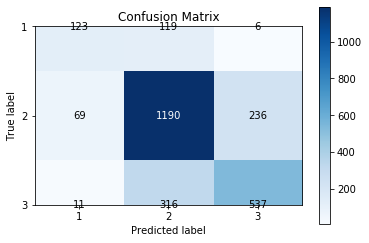

0.7096279248177982 0.7096279248177982


In [47]:
clf.fit(X_train1, y_train)
acc = accuracy_score(y_valid, clf.predict(X_valid1))
fbeta = fbeta_score(y_valid, clf.predict(X_valid1), beta=1, average="micro")
skplt.metrics.plot_confusion_matrix(y_valid, clf.predict(X_valid1))
plt.show()
test_preds = clf.predict(df_test1)
print (acc, fbeta)

In [48]:
subs = pd.read_csv('submission_format.csv')
subs['damage_grade'] = test_preds
subs.to_csv('results_catboost_2.csv', index=False)

In [ ]:
# #With Categorical features
# clf = cb.CatBoostClassifier(loss_function="MultiClass", custom_metric="F1", eval_metric="Accuracy", random_seed=42,
#                             one_hot_max_size=40, cat_features= c_names, task_type="GPU", od_type="Iter", 
#                             od_wait=10, max_depth=14, iterations= 500, l2_leaf_reg= 12, learning_rate= 0.4)
# clf.fit(X_train, y_train)
# acc = accuracy_score(y_valid, clf.predict(X_valid))
# fbeta = fbeta_score(y_valid, clf.predict(X_valid), beta=1, average="micro")
# test_preds = clf.predict(df_test)
# print (acc, fbeta)

### Ensemble

In [ ]:
clf1 = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                      nrounds = 'min.error.idx', num_class = 3, class_weight="balanced", 
                      maximize = False, eval_metric = 'logloss', eta = .1, max_depth = 14,
                      colsample_bytree = .5, n_jobs=-1, 
                      tree_method='gpu_hist', gpu_id=1)
clf2 = BaggingClassifier(n_estimators=500, random_state=42, max_features=25)
# clf3 = lgb.LGBMClassifier(n_estimators=1500, boosting_type='dart', class_weight='balanced',
#                            silent=False, max_depth=12, num_leaves=2000, 
#                            objective="multiclass", random_state=42)
clf3 = cb.CatBoostClassifier(loss_function="MultiClass", custom_metric="F1", eval_metric="Accuracy", random_seed=42,
                            depth=11, iterations= 1000, l2_leaf_reg= 12, learning_rate= 0.4, task_type="GPU")
eclf1 = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], voting='hard', verbose=1)
eclf1.fit(X_train.values, y_train)

In [ ]:
pred = eclf1.predict(X_valid1.values)
fbeta = fbeta_score(y_valid, eclf1.predict(X_valid1.values), beta=1, average="micro")
print ('Fbeta:', fbeta)
fbeta = fbeta_score(y_valid, eclf1.predict(X_valid1.values), beta=1, average="micro")
skplt.metrics.plot_confusion_matrix(y_valid, eclf1.predict(X_valid1.values))
plt.show()
test_pred = eclf1.predict(df_test1.values)

In [ ]:
clf1 = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                      nrounds = 'min.error.idx', num_class = 3, class_weight="balanced", 
                      maximize = False, eval_metric = 'logloss', eta = .1, max_depth = 14,
                      colsample_bytree = .5, n_jobs=-1, 
                      tree_method='gpu_hist', gpu_id=1)
clf2 = BaggingClassifier(n_estimators=500, random_state=42, max_features=23)
# clf3 = lgb.LGBMClassifier(n_estimators=1500, boosting_type='dart', class_weight='balanced',
#                            silent=False, max_depth=12, num_leaves=2000, 
#                            objective="multiclass", random_state=42)
clf3 = cb.CatBoostClassifier(loss_function="MultiClass", custom_metric="F1", eval_metric="Accuracy", random_seed=42,
                            depth=11, iterations= 1000, l2_leaf_reg= 12, learning_rate= 0.4, task_type="GPU")
eclf3 = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], voting='soft', verbose=1)
eclf3.fit(X_train1.values, y_train)

In [ ]:
pred = eclf3.predict(X_valid1.values)
fbeta = fbeta_score(y_valid, eclf3.predict(X_valid1.values), beta=1, average="micro")
print ('Fbeta:', fbeta)
fbeta = fbeta_score(y_valid, eclf3.predict(X_valid1.values), beta=1, average="micro")
skplt.metrics.plot_confusion_matrix(y_valid, eclf3.predict(X_valid1.values))
plt.show()
test_pred = eclf3.predict(df_test1.values)

In [ ]:
clf3 = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',
                      nrounds = 'min.error.idx', num_class = 3, class_weight="balanced", 
                      maximize = False, eval_metric = 'logloss', eta = .1, max_depth = 14,
                      colsample_bytree = .5, n_jobs=-1, 
                      tree_method='gpu_hist', gpu_id=1)
clf1 = BaggingClassifier(n_estimators=500, random_state=42, max_features=25)
# clf2 = lgb.LGBMClassifier(n_estimators=1500, boosting_type='dart', class_weight='balanced',
#                            silent=False, max_depth=12, num_leaves=2000, 
#                            objective="multiclass", random_state=42)
clf2 = cb.CatBoostClassifier(loss_function="MultiClass", custom_metric="F1", eval_metric="Accuracy", random_seed=42,
                            depth=7, iterations= 500, l2_leaf_reg= 7, learning_rate= 0.4, task_type="GPU")
sclf = StackingClassifier(classifiers=[clf3, clf2], 
                          meta_classifier=clf1)

In [ ]:
for clf, label in zip([clf1, clf2, sclf], 
                      [ 'Random Forest',
                       'Bagging',
                       'StackingClassifier']):

    clf.fit(X_train1.values, y_train)
    pred = clf.predict(X_valid1.values)
    fbeta = fbeta_score(y_valid, clf.predict(X_valid1.values), beta=1, average="micro")
    print ('Fbeta:', label, fbeta)